<a href="https://colab.research.google.com/github/sxm18940/ML_FinalProject/blob/main/diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')

In [ ]:
results={}

In [ ]:
#read csv and use first column as index
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("gdrive/My Drive/diamonds.csv",index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
original_length=len(df) #length of the data before removing Null and 0 zero values

In [ ]:
#let's check the data types of the columns
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
#check are there any null values in the dataset
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

From above, we can see there are no null values in the dataset.

In [ ]:
#describe the dataset
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


If you see above, the minimum values of x,y and z are 0. which is not possible. 
As x,y and z are the dimensions of the diamond, x,y and z cannot be less than or equal to 0.
so, we delete all the rows with x,y and z less than or equal to 0.

In [ ]:
#get index of all rows with value 0
to_drop_indices=df.index[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
df.drop(to_drop_indices,inplace=True)

In [ ]:
#now let's check the minimum values of x,y and z dimensions
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
print("Number of records removed are:",original_length-len(df))

Number of records removed are: 20


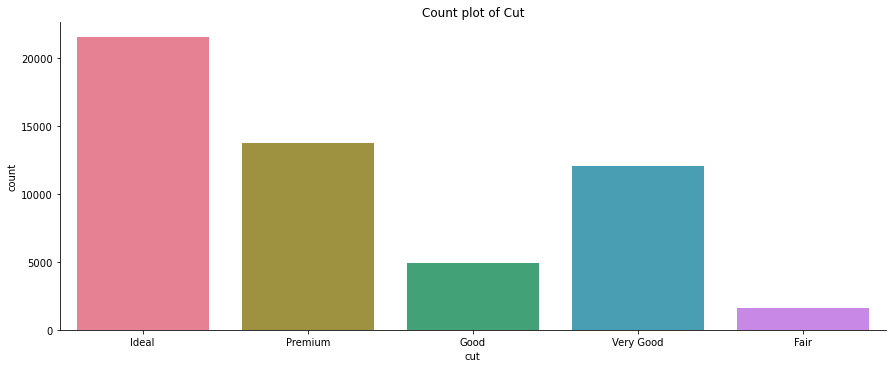

In [ ]:
#cat plot of cut 
#generate 5 colours for the plot
colors = sns.color_palette("husl", len(df.cut.unique()))
sns.catplot(x="cut", kind="count", aspect= 2.5, data=df, palette=colors)
plt.title('Count plot of Cut')
plt.show()

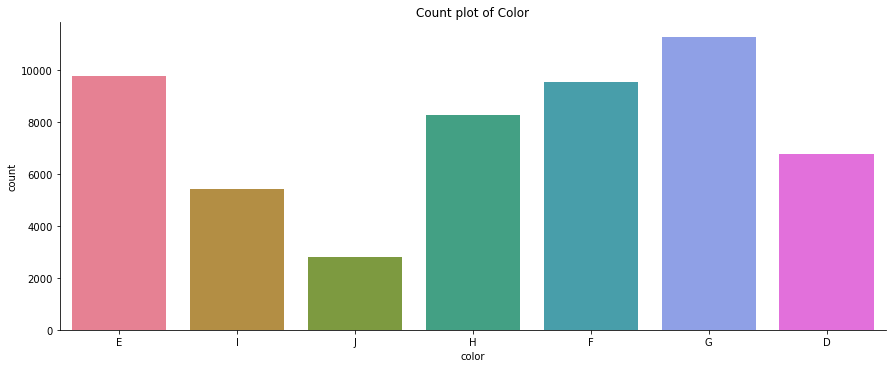

In [ ]:
#cat plot of color
colors=sns.color_palette("husl", len(df.color.unique()))

sns.catplot(x="color", kind="count", aspect= 2.5, data=df, palette=colors)
plt.title('Count plot of Color')
plt.show()

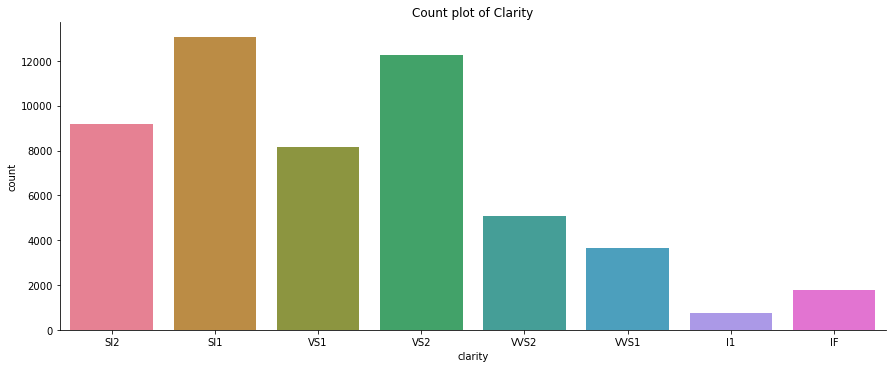

In [ ]:
#cat plot of clarity

colors=sns.color_palette("husl", len(df.clarity.unique()))

sns.catplot(x="clarity", kind="count", aspect= 2.5, data=df, palette=colors)
plt.title('Count plot of Clarity')
plt.show()

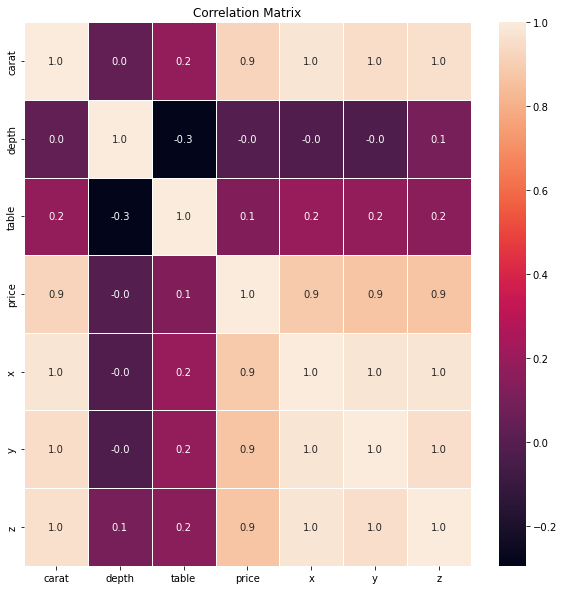

In [ ]:
#let us now draw the correlation matrix for the given dataset

corr = df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor="white",fmt= '.1f')
plt.show()

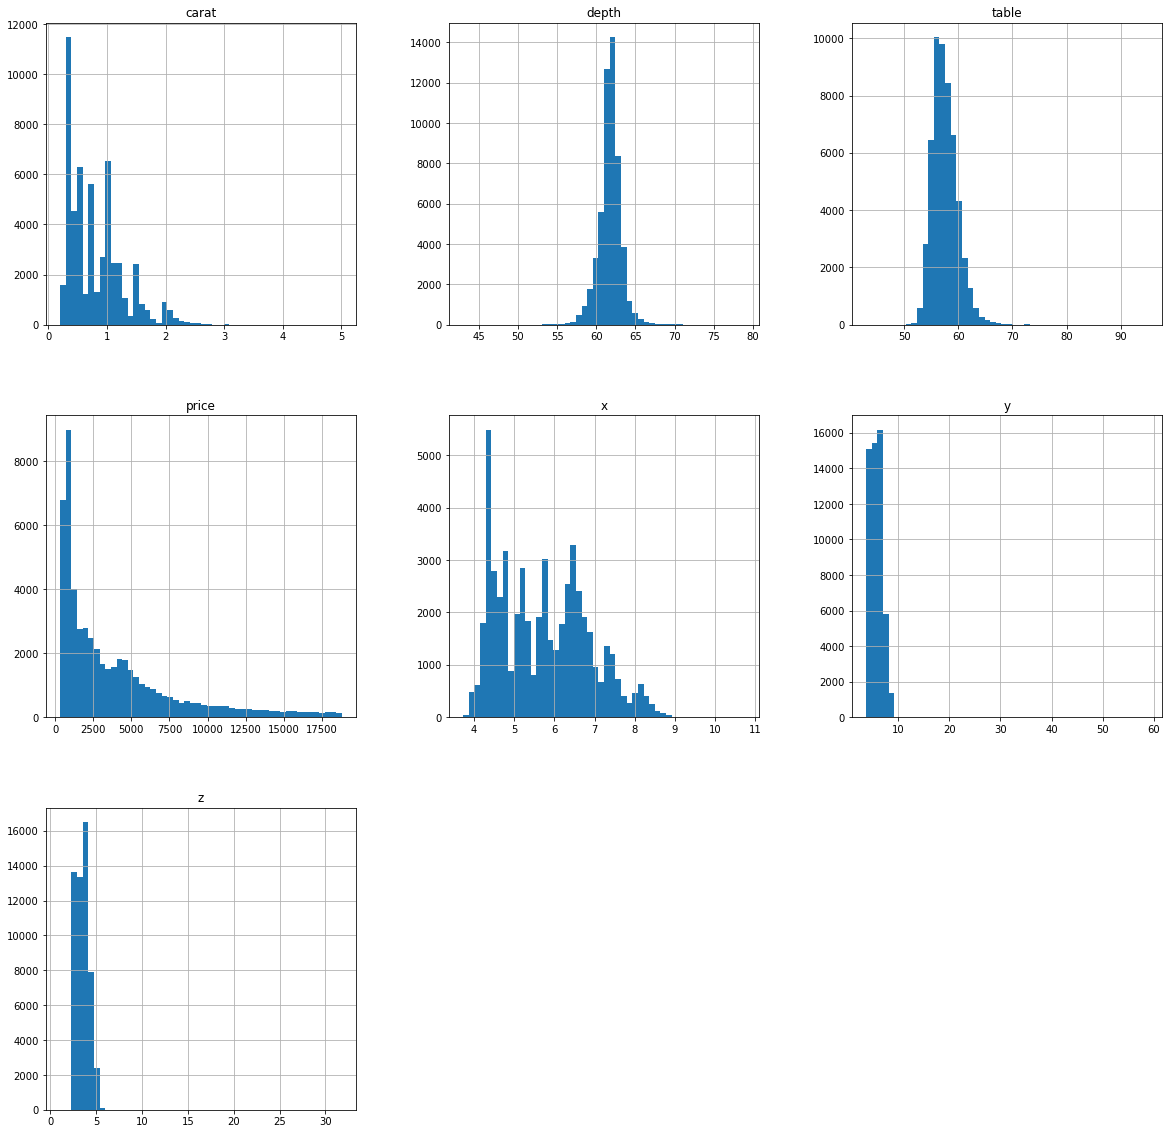

In [ ]:
#let us now plot histogram for each of the columns

df.hist(bins=50,figsize=(20,20))
plt.title("Histogram for each numeric input variable")
plt.show()

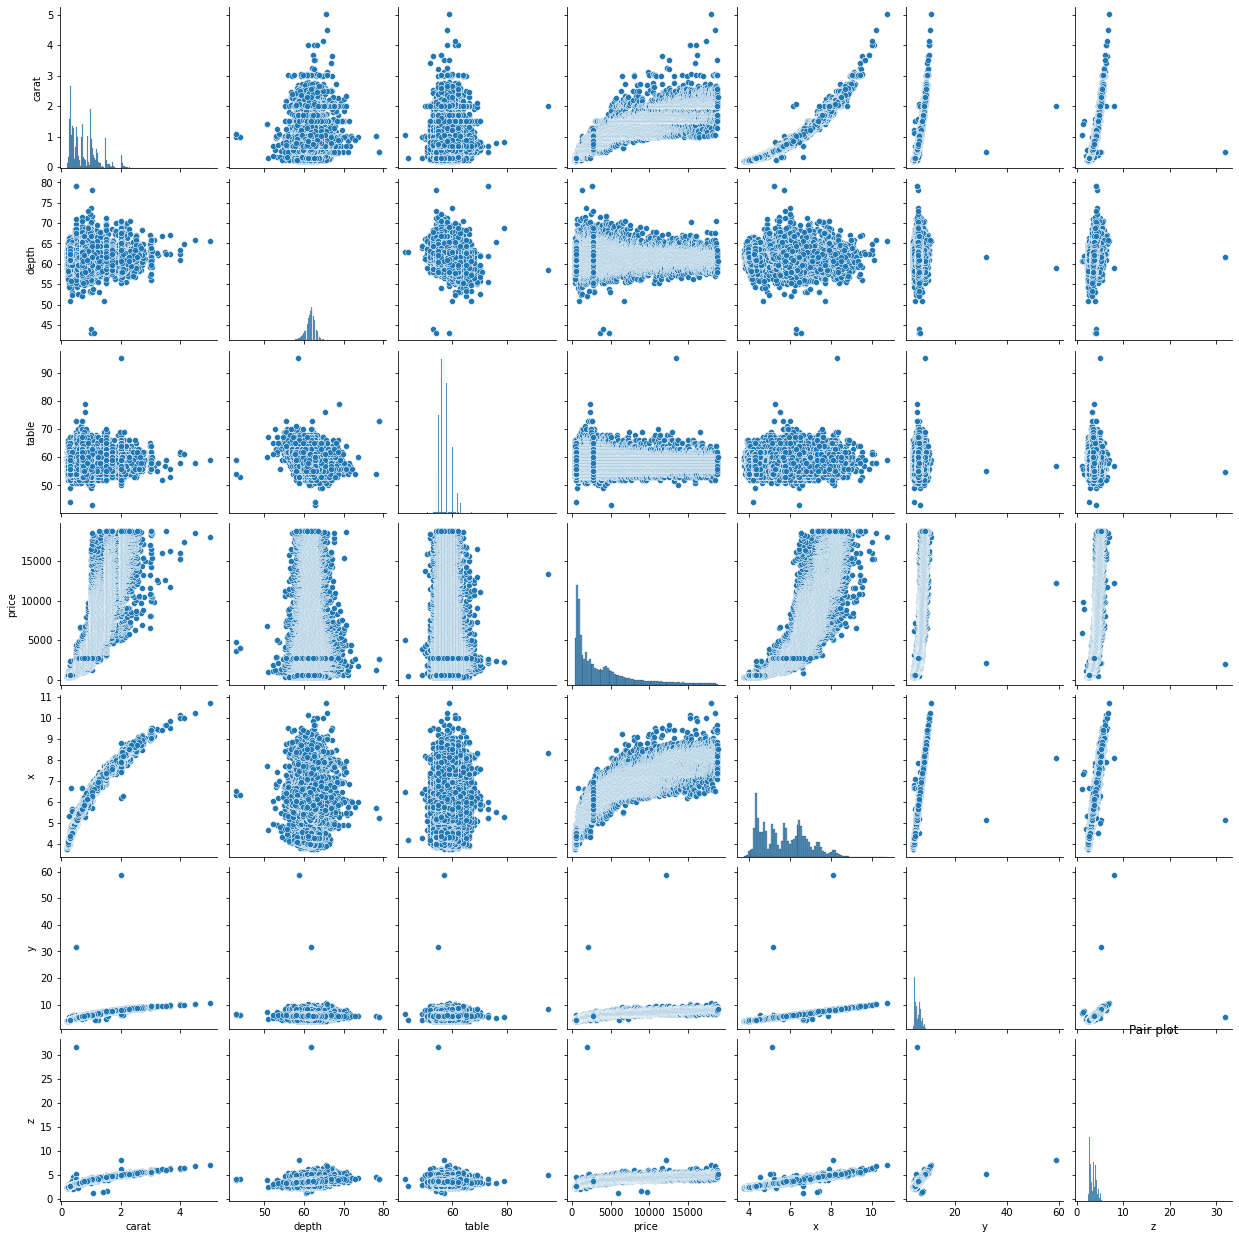

In [ ]:
#let us now plot scatter plot for each of the columns
sns.pairplot(df)
plt.title('Pair plot')
plt.show()

Histogram and Scatter plot helps us to understand the distribution of the data.

Now, let us create new feature called volume by multiplying x,y and z and store it in a new column. Then drop the old x,y and z columns.

In [ ]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
df.drop(['x','y','z'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [ ]:
#we can see that depth is not correlated with price. So let us drop it

# df.drop(['depth'],axis=1,inplace=True)
# df.head()

Let us now do the feature encoding part

In [ ]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
1,0.23,2,1,3,61.5,55.0,326,38.202030
2,0.21,3,1,2,59.8,61.0,326,34.505856
3,0.23,1,1,4,56.9,65.0,327,38.076885
4,0.29,3,5,5,62.4,58.0,334,46.724580
5,0.31,1,6,3,63.3,58.0,335,51.917250


In [ ]:
X = df.drop(['price'],axis=1)
Y = df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#apply standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now, let us train nearest neighbour classifier model.
In Nearest Neighbour model, we will use the minkowski distance to calculate the distance between two points.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
knn = KNeighborsRegressor()
knn.fit(X_train , Y_train)
accuracies = cross_val_score(estimator = knn, X = X_train, y = Y_train, cv = 5,verbose = 1)
y_pred = knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % knn.score(X_test, Y_test))
print("Accuracies of cross val score: ",accuracies)
print("Mean of accuracies: ",accuracies.mean())

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred)**0.5
r2 = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished



###### KNeighbours Regression ######
Score : 0.9573
Accuracies of cross val score:  [0.95713686 0.95392361 0.95092009 0.95816611 0.95359203]
Mean of accuracies:  0.9547477404391074

MSE    : 684673.92 
MAE    : 434.33 
RMSE   : 827.45 
R2     : 0.96 


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,2,5,10,15,20],'p':[1,2,3]}
knn_reg = KNeighborsRegressor(weights='distance')
knn_reg_cv = GridSearchCV(knn_reg,parameters,cv=5)
knn_reg_cv.fit(X_train,Y_train)
print('')
print('###### KNeighbours Regression ######')
print('Best Parameters : ',knn_reg_cv.best_params_)
print('Best Score : ',knn_reg_cv.best_score_)


###### KNeighbours Regression ######
Best Parameters :  {'n_neighbors': 10, 'p': 1}
Best Score :  0.9631399821804967


In [ ]:
best_knn_model=knn_reg_cv.best_estimator_
best_knn_model.fit(X_train,Y_train)
y_pred = best_knn_model.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % best_knn_model.score(X_test, Y_test))
print(accuracies)
results['KNN']={}
results['KNN']['mse'] = mean_squared_error(Y_test, y_pred)
results['KNN']['mae'] = mean_absolute_error(Y_test, y_pred)
results['KNN']['rmse'] = mean_squared_error(Y_test, y_pred)**0.5
results['KNN']['r2'] = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % results['KNN']['mse'])
print('MAE    : %0.2f ' % results['KNN']['mae'])
print('RMSE   : %0.2f ' % results['KNN']['rmse'])
print('R2     : %0.2f ' % results['KNN']['r2'])


###### KNeighbours Regression ######
Score : 0.9690
[0.95713686 0.95392361 0.95092009 0.95816611 0.95359203]

MSE    : 497410.16 
MAE    : 363.01 
RMSE   : 705.27 
R2     : 0.97 


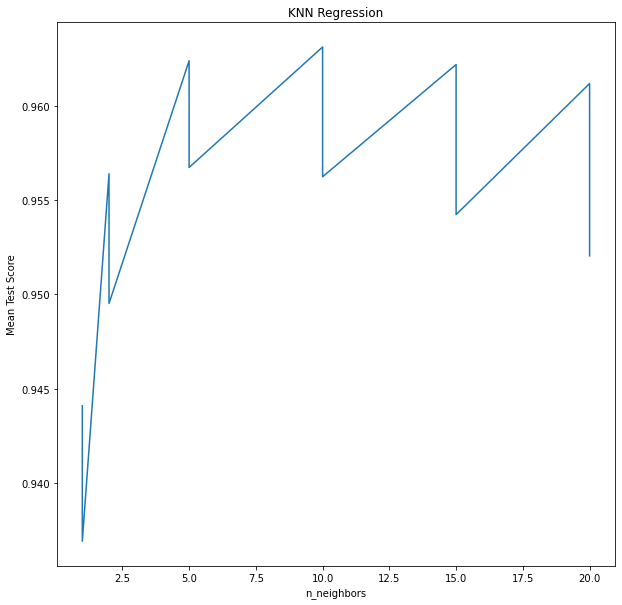

In [ ]:
#plot graph for mean test cores for all values of n_neighbors
plt.figure(figsize=(10,10))
plt.plot(knn_reg_cv.cv_results_["param_n_neighbors"],knn_reg_cv.cv_results_["mean_test_score"])
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.title("KNN Regression")
plt.show()

In [ ]:
#develop linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
print('')
print('###### Linear Regression ######')
print('Score : %.4f' % lr.score(X_test, Y_test))

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred)**0.5
r2 = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)



###### Linear Regression ######
Score : 0.8866

MSE    : 1818420.48 
MAE    : 922.17 
RMSE   : 1348.49 
R2     : 0.89 


In [ ]:
#tune the model using grid search
parameters = {'fit_intercept':[True,False],'normalize':[True,False]}
lr_reg = LinearRegression()
lr_reg_cv = GridSearchCV(lr_reg,parameters,cv=5)
lr_reg_cv.fit(X_train,Y_train)
print('')
print('###### Linear Regression ######')
print('Best Parameters : ',lr_reg_cv.best_params_)
print('Best Score : ',lr_reg_cv.best_score_)




###### Linear Regression ######
Best Parameters :  {'fit_intercept': True, 'normalize': True}
Best Score :  0.8492097357673833


In [ ]:
best_lr_model=lr_reg_cv.best_estimator_
best_lr_model.fit(X_train,Y_train)
y_pred = best_lr_model.predict(X_test)
print('')
print('###### Linear Regression ######')
print('Score : %.4f' % best_lr_model.score(X_test, Y_test))
print(accuracies)
results['Linear']={}
results['Linear']['mse'] = mean_squared_error(Y_test, y_pred)
results['Linear']['mae'] = mean_absolute_error(Y_test, y_pred)
results['Linear']['rmse'] = mean_squared_error(Y_test, y_pred)**0.5
results['Linear']['r2'] = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % results['Linear']['mse'])
print('MAE    : %0.2f ' % results['Linear']['mae'])
print('RMSE   : %0.2f ' % results['Linear']['rmse'])
print('R2     : %0.2f ' % results['Linear']['r2'])



###### Linear Regression ######
Score : 0.8866
[0.95713686 0.95392361 0.95092009 0.95816611 0.95359203]

MSE    : 1818420.48 
MAE    : 922.17 
RMSE   : 1348.49 
R2     : 0.89 


In [ ]:
#develop decision tree regression model

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
print('')
print('###### Decision Tree Regression ######')
print('Score : %.4f' % dt.score(X_test, Y_test))

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred)**0.5
r2 = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


###### Decision Tree Regression ######
Score : 0.9652

MSE    : 558463.83 
MAE    : 354.77 
RMSE   : 747.30 
R2     : 0.97 


In [ ]:
#tune the model using grid search

parameters = {'criterion':['squared_error','poisson'],'max_depth':[3,5,7,9],'min_samples_split':[3,5,7,9],'min_samples_leaf':[1,3,7,9]}
dt_reg = DecisionTreeRegressor()
dt_reg_cv = GridSearchCV(dt_reg,parameters,cv=5)
dt_reg_cv.fit(X_train,Y_train)
print('')
print('###### Decision Tree Regression ######')
print('Best Parameters : ',dt_reg_cv.best_params_)
print('Best Score : ',dt_reg_cv.best_score_)


###### Decision Tree Regression ######
Best Parameters :  {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 9}
Best Score :  0.9714582430519787


In [ ]:
best_dt_model=dt_reg_cv.best_estimator_
best_dt_model.fit(X_train,Y_train)
y_pred = best_dt_model.predict(X_test)

print('')
print('###### Decision Tree Regression ######')
print('Score : %.4f' % best_dt_model.score(X_test, Y_test))
print(accuracies)
results['Decision Tree']={}
results['Decision Tree']['mse'] = mean_squared_error(Y_test, y_pred)
results['Decision Tree']['mae'] = mean_absolute_error(Y_test, y_pred)
results['Decision Tree']['rmse'] = mean_squared_error(Y_test, y_pred)**0.5
results['Decision Tree']['r2'] = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % results['Decision Tree']['mse'])
print('MAE    : %0.2f ' % results['Decision Tree']['mae'])
print('RMSE   : %0.2f ' % results['Decision Tree']['rmse'])
print('R2     : %0.2f ' % results['Decision Tree']['r2'])


###### Decision Tree Regression ######
Score : 0.9715
[0.95713686 0.95392361 0.95092009 0.95816611 0.95359203]

MSE    : 457624.60 
MAE    : 353.87 
RMSE   : 676.48 
R2     : 0.97 


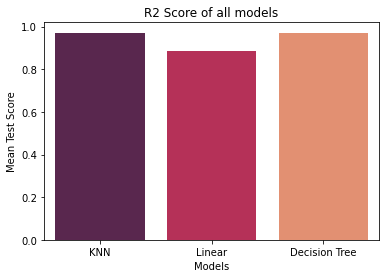

In [ ]:
#bar plot r2_score for all models
models=list(results.keys())
r2_scores=[]
for model in models:
    r2_scores.append(results[model]['r2'])
sns.barplot(x=models,y=r2_scores,palette='rocket')
plt.xlabel('Models')
plt.ylabel('Mean Test Score')
plt.title("R2 Score of all models")
plt.show()


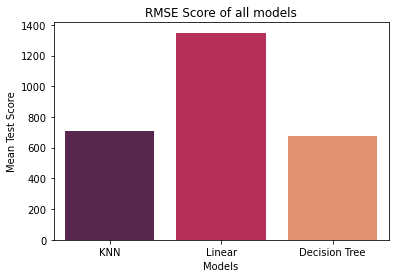

In [ ]:
#bar plot for all models rmse score

models=list(results.keys())
rmse_scores=[]
for model in models:
    rmse_scores.append(results[model]['rmse'])
sns.barplot(x=models,y=rmse_scores,palette='rocket')
plt.xlabel('Models')
plt.ylabel('Mean Test Score')
plt.title("RMSE Score of all models")
plt.show()

In [ ]:
#get model name with highest r2_score from results dictionary

max_r2_score = max(results, key=lambda key: results[key]['r2'])
print('Model with highest r2_score is : ',max_r2_score)

Model with highest r2_score is :  Decision Tree


### Predictions

In [ ]:
#use the best model to make diamond price prediction

print('')
print('###### Predicting Diamond Price ######')
print('')
carat,cut,color,clarity,depth,table,x,y,z = 0.23,"Ideal","E","SI2",61.5,55,3.95,3.98,2.43


#uncomment below lines to dynamically take input from user

# print('Enter the following details to predict the price of diamond')
# print('')
# carat = float(input('Enter the carat of diamond : '))
# cut = input('Enter the cut of diamond : ')
# color = input('Enter the color of diamond : ')
# clarity = input('Enter the clarity of diamond : ')
# depth = float(input('Enter the depth of diamond : '))
# table = float(input('Enter the table of diamond : '))
# x = float(input('Enter the x of diamond : '))
# y = float(input('Enter the y of diamond : '))
# z = float(input('Enter the z of diamond : '))
# print('')

#convert categorical data to numerical data

cut = label_cut.transform([cut])
color = label_color.transform([color])
clarity = label_clarity.transform([clarity])
volume=x*y*z

input_data = [[carat,cut,color,clarity,depth,table,volume]]

input_data=sc.transform(input_data)

#predict the price of diamond using best model

price = dt_reg_cv.best_estimator_.predict(input_data)
print("Input Data : ")
print("\tCarat : ",carat)
print("\tCut : ",label_cut.inverse_transform(cut)[0])
print("\tColor : ",label_color.inverse_transform(color)[0])
print("\tClarity : ",label_clarity.inverse_transform(clarity)[0])
print("\tDepth : ",depth)
print("\tTable : ",table)
print("\tVolume : ",volume)
print('')
print('Predicted price of diamond by the best model is : ',price[0])


###### Predicting Diamond Price ######

Input Data : 
	Carat :  0.23
	Cut :  Ideal
	Color :  E
	Clarity :  SI2
	Depth :  61.5
	Table :  55
	Volume :  38.20203

Predicted price of diamond by the best model is :  460.7920792079208
